<a href="https://colab.research.google.com/github/NishiVerma1909/Employee-Salary-Prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


In [11]:
# Load the dataset
df = pd.read_csv("adult.csv")  # Replace with your actual filename

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop missing values (optional: fill with mode for better retention)
df.dropna(inplace=True)


In [12]:
X = df.drop("income", axis=1)
y = df["income"]

# Encode the target variable
y = y.apply(lambda x: 1 if x == '>50K' else 0)

In [13]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns


In [14]:
# Define preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [16]:
# Create XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


In [17]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Fit the pipeline
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype=...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [19]:
# Predict on test data
y_pred = pipeline.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4533
           1       0.76      0.65      0.70      1500

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033



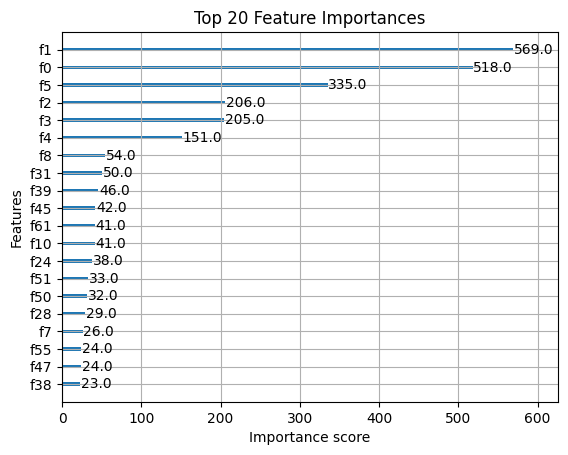

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract trained XGBoost model from pipeline
xgb_model_fitted = pipeline.named_steps['classifier']

# Plot feature importance (top 20)
xgb.plot_importance(xgb_model_fitted, max_num_features=20)
plt.title("Top 20 Feature Importances")
plt.show()


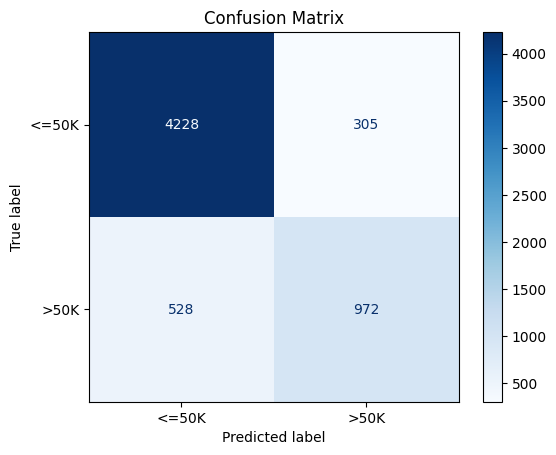

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display the matrix with proper class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import roc_auc_score

# Probability for the positive class (1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute AUC score
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.4f}")


ROC-AUC Score: 0.9231
